# Problem Set 5: Trees, Forests, and Networks


## Part 1: Exploring The Titanic

Your mission for this problem set is to use your knowledge of supervised machine learning to try to predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis. We **highly recommend** you closely go over the entire problem set once before starting; this is important, so that you understand the sequence of steps and not perform redundant work.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll need the `train.csv` data. Treat this as your entire dataset, and further build train and test splits from this dataset whenever required. 

### 1.1 Exploratory data analysis

Create 2-3 figures and tables that help give you a feel for the data. Make sure to at least check the data type of each variable, to understand which variables have missing observations, and to understand the distribution of each variable (and determine whether the variables should be standardized or not). Are any of the potential predictor variables (i.e., anything execpt for survival) collinear or highly correlated? Remember that this is the EDA phase, and we want to save pre-processing steps like imputations, transformations etc. and feature engineering for later.

In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier


%matplotlib inline  
import matplotlib.pyplot as plt  


In [3]:
# Your code here
df = pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
summary = df.describe()
summary.T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292

In [6]:
for columns in df.columns:
 print('%s: %s' %(columns,type(df[columns][0])))

PassengerId: <class 'numpy.int64'>
Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Name: <class 'str'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Ticket: <class 'str'>
Fare: <class 'numpy.float64'>
Cabin: <class 'float'>
Embarked: <class 'str'>


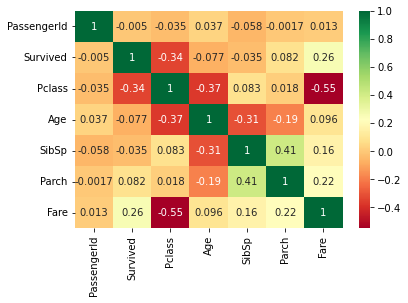

In [7]:
import seaborn as sn

corrMatrix = df.corr()
#fig = plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

Text(0.5, 1.0, 'Fare')

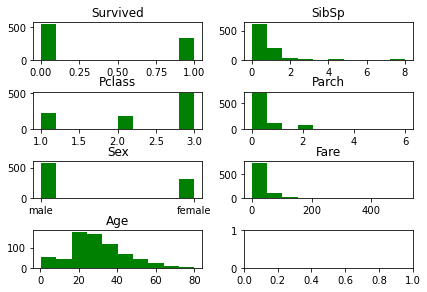

In [8]:
fig, axs = plt.subplots(4, 2)
fig.tight_layout()
#
axs[0][0].hist(df['Survived'], color='green')
axs[0][0].set_title('Survived')

axs[1][0].hist(df['Pclass'], color='green')
axs[1][0].set_title('Pclass')

axs[2][0].hist(df['Sex'], color='green')
axs[2][0].set_title('Sex')

axs[3][0].hist(df['Age'], color='green')
axs[3][0].set_title('Age')

axs[0][1].hist(df['SibSp'], color='green')
axs[0][1].set_title('SibSp')

axs[1][1].hist(df['Parch'], color='green')
axs[1][1].set_title('Parch')

axs[2][1].hist(df['Fare'], color='green')
axs[2][1].set_title('Fare')

1. `Age`, `Cabin`, and `Embarked`have missing value
2. `Age` is right skewed
3. `Pclass` and `Fare` are highlt correlated

### 1.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. You can start with simple correlations, but will likely also want to use multiple regression and/or other methods in your toolkit. What do you conclude?

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Your code here
print(smf.ols(formula='Survived ~ Age', data=df).fit().summary()) #family size

df['Age*Fare'] = df['Age']*df['Fare']
print(smf.ols(formula='Survived ~ Age + Fare + Age*Fare', data=df).fit().summary()) #family size


                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.271
Date:                Mon, 04 Apr 2022   Prob (F-statistic):             0.0391
Time:                        23:28:15   Log-Likelihood:                -503.28
No. Observations:                 714   AIC:                             1011.
Df Residuals:                     712   BIC:                             1020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4838      0.042     11.576      0.0

1. `Age` is negatively correlated with `Survived`
2. `Fare` are positively correlated with  `Survived`

### 1.3 Preprocessing steps
Take whatever pre-processing steps you believe are necessary for each variable in the dataset (for example, these might include normalization, standardization, log transforms, dummy-encoding, or dropping a variable altogether). For now, you can ignore null values in the dataset --- we'll come back to those later. Create a table describing the preprocessing step for each variable. Make sure the variables are alphabetized and your table is well-organized.

In [10]:
# Your code here

df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0) #recode variable 'poor'
#df['Embarked'] = df['Embarked'].apply(lambda x: 1 if x == 'male' else 0) #recode variable 'poor'

#standardize
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

df['Age'] = standardize(df['Age'])
df['Fare'] = standardize(df['Fare'])
df['SibSp'] = standardize(df['SibSp'])
df['Parch'] = standardize(df['Parch'])

#dummy variables
df = pd.get_dummies(df, columns=['Embarked'])
df = pd.get_dummies(df, columns=['Pclass'])

df = df.drop(['PassengerId', 'Ticket'], axis=1)

df.head()

Survived                                               Name  Sex       Age  \
0         0                            Braund, Mr. Owen Harris    1 -0.530377   
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.571831   
2         1                             Heikkinen, Miss. Laina    0 -0.254825   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.365167   
4         0                           Allen, Mr. William Henry    1  0.365167   

      SibSp     Parch      Fare Cabin   Age*Fare  Embarked_C  Embarked_Q  \
0  0.432793 -0.473674 -0.502445   NaN   159.5000           0           0   
1  0.432793 -0.473674  0.786845   C85  2708.7654           1           0   
2 -0.474545 -0.473674 -0.488854   NaN   206.0500           0           0   
3  0.432793 -0.473674  0.420730  C123  1858.5000           0           0   
4 -0.474545 -0.473674 -0.486337   NaN   281.7500           0           0   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           1         0         0         1  
1           0         1         0         0  
2           1         0         0         1  
3           1         1         0         0  
4           1         0         0         1

## Part 2: Decision Trees
### 2.1 Decision Tree
Using the basic [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  in sklearn, fit a model to predict titanic survival, using 10-fold cross-validation. For this and the following problems, you should set aside some (20%) of your training data as held-out test data, prior to cross-validation. 

Begin by using the default hyperparameters, and report the average training and cross-validated accuracy across the 10 folds.  Then, fit a single decision tree model on all of the training data (i.e., no cross-validation in this particular step), and report the performance of this fitted model on the held-out test data -- how does it compare to the cross-validated accuracy? Finally, show a diagram of this tree (at least the first three levels of splits), and provide a couple sentences interpreting the tree diagram.

NOTE - You may drop columns with null values for now; we'll come back to those columns later in the problem set.

In [11]:
df_dropna = df.dropna(subset=['Age'])

np.random.seed(seed=13579)

# enter your code here
train_percent = .80
train_number = int(train_percent*len(df_dropna))
print('Total examples: %i' % len(df_dropna))
print('Number of training examples: %i' % train_number)
print('Number of testing examples: %i' % (len(df_dropna) - train_number))

ids = np.arange(0, len(df_dropna), 1)
ids = np.random.permutation(ids)
df_dropna_shuffled = df_dropna.iloc[ids]

df_train_dropna = df_dropna_shuffled[:train_number]
df_test_dropna = df_dropna_shuffled[train_number:]

Total examples: 714
Number of training examples: 571
Number of testing examples: 143


========== average training accuracy (CV) ==========
0.9920214500800206
========== average cross-validation accuracy (CV) ==========
0.7442226255293405
========== accuracy (test data) ==========
0.7342657342657343


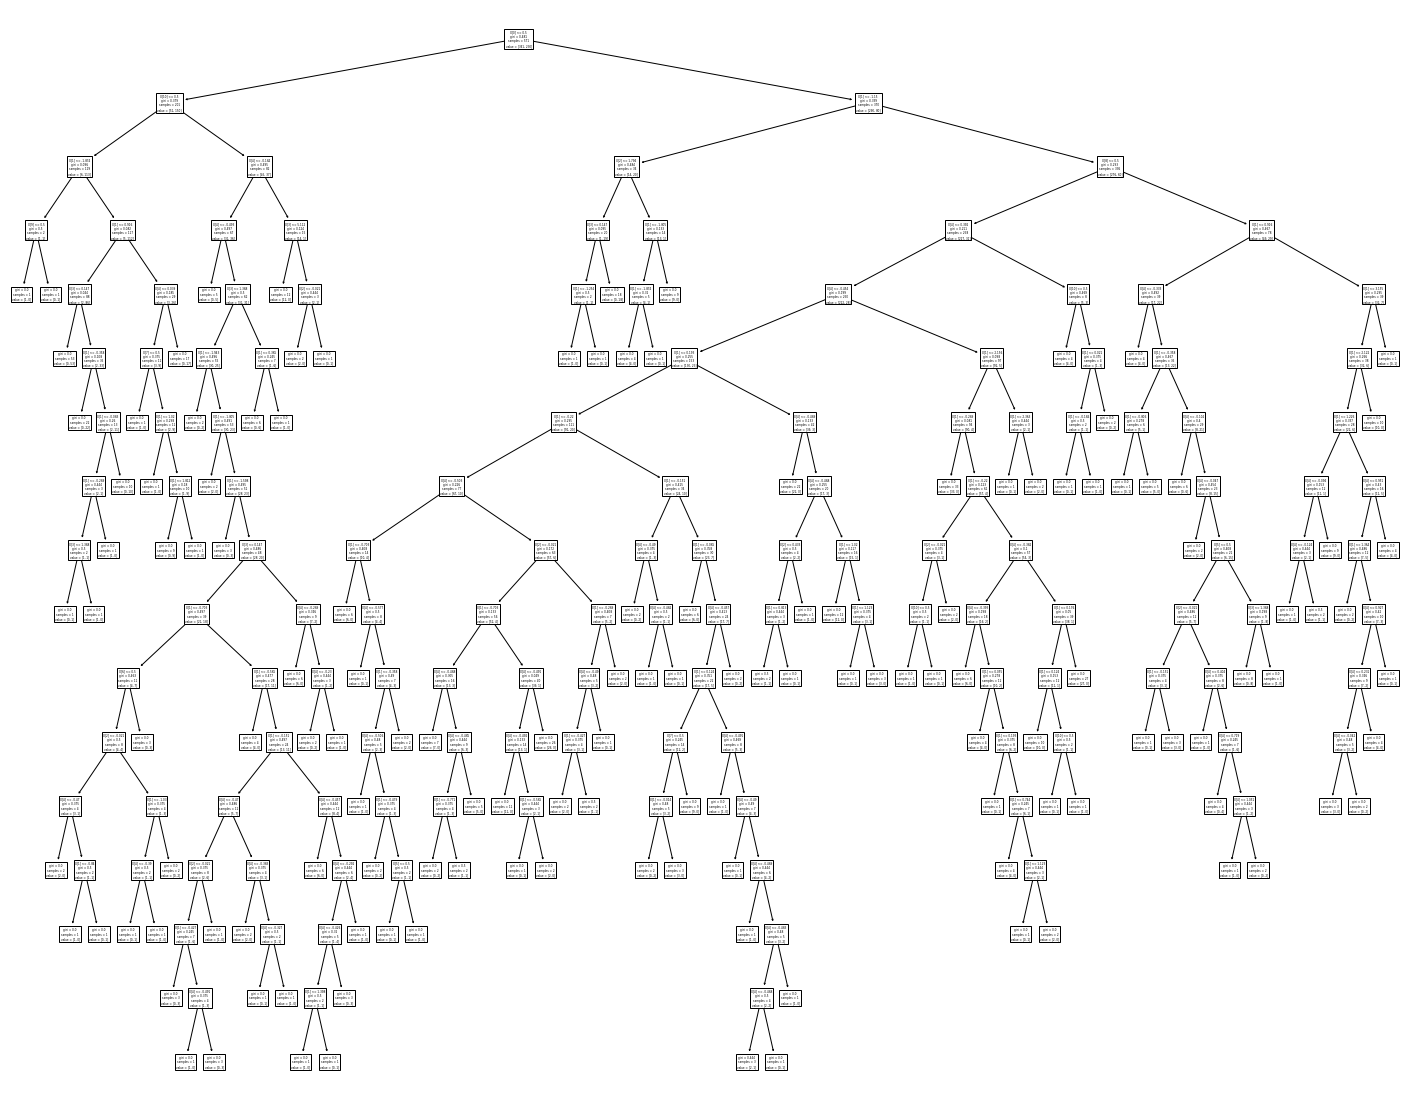

In [12]:
# Your code here
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
kf = KFold(n_splits=10)
acc_test = []
acc_train = []

for train, test in kf.split(df_train_dropna):
    X = df_train_dropna[feature] 
    y = df_train_dropna['Survived']
    clf = DecisionTreeClassifier()
    clf = clf.fit(X.iloc[train],y.iloc[train])

    # calculate prediction
    y_pred_test = clf.predict(X.iloc[test])
    y_pred_train = clf.predict(X.iloc[train])

    # calculate accuracy
    acc_test.append(metrics.accuracy_score(y.iloc[test], y_pred_test))
    acc_train.append(metrics.accuracy_score(y.iloc[train], y_pred_train))

print('========== average training accuracy (CV) ==========')
print(np.mean(acc_train))

print('========== average cross-validation accuracy (CV) ==========')
print(np.mean(acc_test))

# fit a single decision tree model on all of the training data
clf = DecisionTreeClassifier().fit(df_train_dropna[feature], df_train_dropna['Survived'])
y_pred = clf.predict(df_test_dropna[feature])
acc = metrics.accuracy_score(df_test_dropna['Survived'], y_pred)
print('========== accuracy (test data) ==========')
print(acc)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

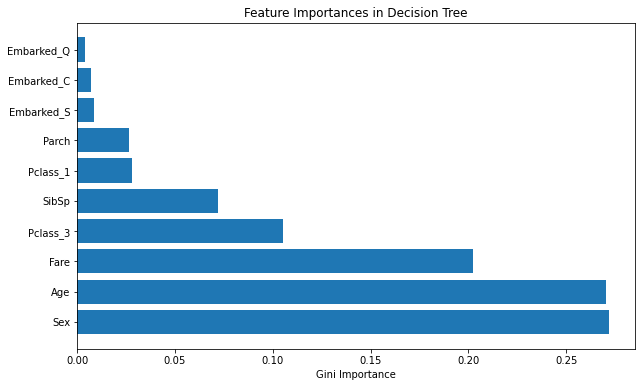

In [13]:
importances = clf.feature_importances_
importances = pd.DataFrame([df_train_dropna[feature].columns, importances]).T
importances.columns = ['Feature', 'Importance']
importances = importances.sort_values('Importance', ascending=False)[:10]

# Bar chart
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
ax.set_xlabel('Gini Importance')
ax.set_title('Feature Importances in Decision Tree')
plt.show()

* the test data accuracy (0.734) is smaller than the average cross-validation accuracy (0.744) 

### 2.2 Hyperparameter: Maximum Depth

Use all of the data (minus the held-out data) to re-fit a single decision tree with `max_depth = 4` (i.e., no cross-validation). Show the tree diagram and also plot the feature importance. What do you observe? How does the performance of this tree compare to the tree from 2.1?

========== accuracy (test data) ==========
0.7902097902097902


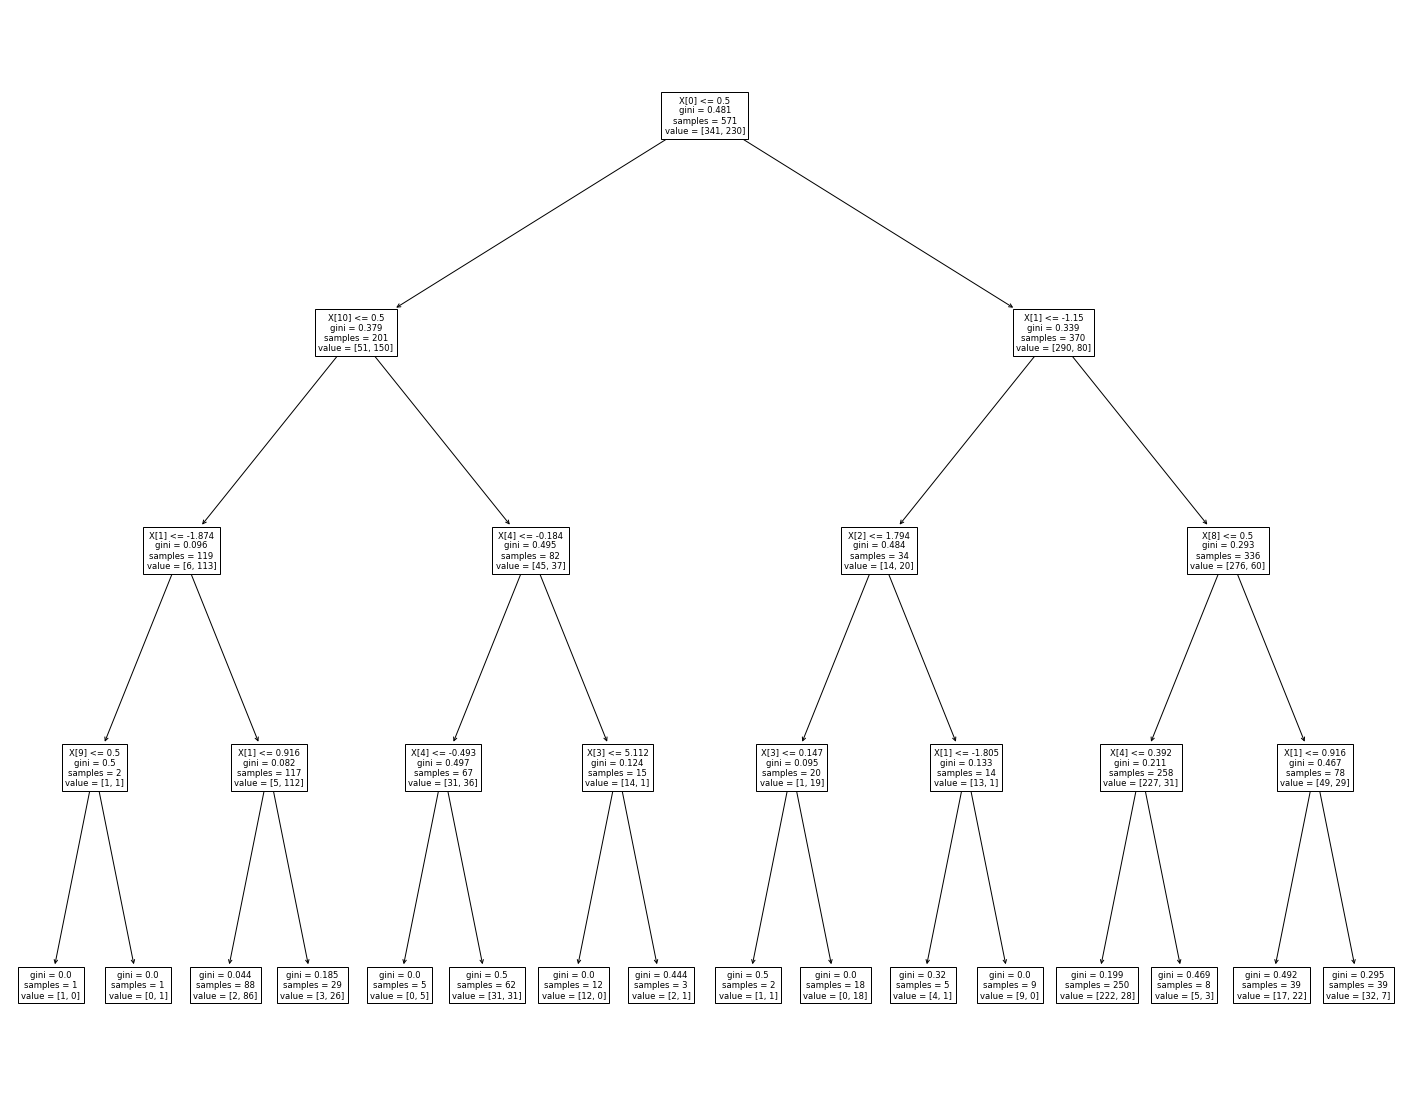

In [14]:
# Your code here
# fit a single decision tree model on all of the training data
clf = DecisionTreeClassifier(max_depth = 4).fit(df_train_dropna[feature], df_train_dropna['Survived'])
y_pred = clf.predict(df_test_dropna[feature])
acc = metrics.accuracy_score(df_test_dropna['Survived'], y_pred)
print('========== accuracy (test data) ==========')
print(acc)

#plot tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()

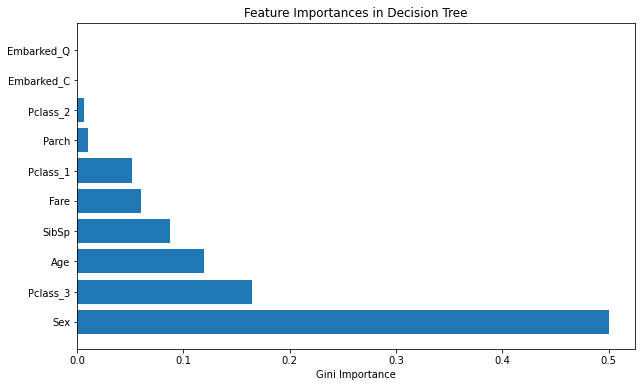

In [15]:
importances = clf.feature_importances_
importances = pd.DataFrame([df_train_dropna[feature].columns, importances]).T
importances.columns = ['Feature', 'Importance']
importances = importances.sort_values('Importance', ascending=False)[:10]

# Bar chart
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
ax.set_xlabel('Gini Importance')
ax.set_title('Feature Importances in Decision Tree')
plt.show()

* the performance of this tree (acc = 0.79) is better than the previous tree (acc = 0.73)
* the node of this tree is much fewer than the previous one
* both trees consider 'Sex' the most important feature. The first tree consider 'Age' as the second important feature, whereas the second three considers 'Pclass_3'

### 2.3  Tuning Hyperparameters
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of these parameters affects performance.

First, show how `max_depth` affects train and cross-validated accuracy. On a single axis, plot train and cross-validated accuracy as a function of `max_depth`. Use a red line to show cross-validated accuracy and a blue line to show train accuracy. Do not use your held-out test data yet.

Second, show how cross-validated accuracy relates to both `max_depth` and `min_samples_leaf`. Specifically, create a 3-D plot where the x-axis is `max_depth`, the y-axis is `min_samples_leaf`, and the z-axis shows cross-validated accuracy. What combination of `max_depth` and `min-samples_leaf` achieves the highest accuracy? How sensitive are the results to these two parameters?

Finally, select the the best hyperparameters that you got through cross-validation, and fit a single decision tree on all of the training data using those hyperparameters. Display this tree and report the accuracy of this tree on the held-out data.

In [16]:
# Your code here
feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
kf = KFold(n_splits=5)

maxdepth = np.linspace(1,10,10) 
ACC_maxdepth = {}
ACC_maxdepth_train = []
ACC_maxdepth_test = []


for dep in maxdepth:
    acc_test = []
    acc_train = []
    for train, test in kf.split(df_train_dropna):
        X = df_train_dropna[feature] 
        y = df_train_dropna['Survived']
        clf = DecisionTreeClassifier(max_depth = dep)
        clf = clf.fit(X.iloc[train],y.iloc[train])

        # calculate prediction
        y_pred_test = clf.predict(X.iloc[test])
        y_pred_train = clf.predict(X.iloc[train])

        # calculate accuracy
        acc_test.append(metrics.accuracy_score(y.iloc[test], y_pred_test))
        acc_train.append(metrics.accuracy_score(y.iloc[train], y_pred_train))

    ACC_maxdepth.update({dep: [np.mean(acc_train), np.mean(acc_test)]}) 
    ACC_maxdepth_train.append(np.mean(acc_train))
    ACC_maxdepth_test.append(np.mean(acc_test))

{1.0: [0.770574686168375, 0.7705263157894737], 2.0: [0.7977196821375101, 0.7932723112128147], 3.0: [0.8239846059349688, 0.8142791762013731], 4.0: [0.8485009021459557, 0.7880396643783371], 5.0: [0.8673288801873392, 0.7949809305873379], 6.0: [0.8817776114246229, 0.787948131197559], 7.0: [0.9019184997504703, 0.7809763539282991], 8.0: [0.9207455180621137, 0.7862090007627766], 9.0: [0.9386991823102614, 0.7809458428680397], 10.0: [0.9584024338746209, 0.7634630053394356]}


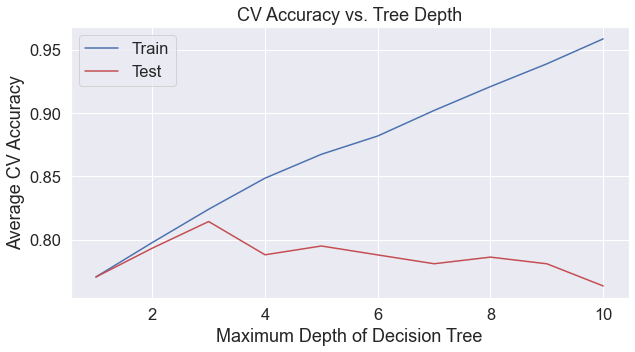

In [17]:
print(ACC_maxdepth)

sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, figsize=(10, 5))

#scatter plot
plt.plot(maxdepth, ACC_maxdepth_train, label='Train', color = 'b')
plt.plot(maxdepth, ACC_maxdepth_test, label='Test', color = 'r')

ax.set_xlabel('Maximum Depth of Decision Tree')
ax.set_ylabel('Average CV Accuracy')
ax.set_title('CV Accuracy vs. Tree Depth')
ax.legend(loc='best')
plt.show()

In [18]:
# Your code here
# fit a single decision tree model on all of the training data
clf = DecisionTreeClassifier(max_depth = 3).fit(df_train_dropna[feature], df_train_dropna['Survived'])
y_pred = clf.predict(df_test_dropna[feature])
acc = metrics.accuracy_score(df_test_dropna['Survived'], y_pred)
print('========== accuracy (test data) ==========')
print(acc)

========== accuracy (test data) ==========
0.8391608391608392


In [19]:
feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = df_train_dropna[feature] 
y = df_train_dropna['Survived']

# Tune hyperparameter: max_depth, min_samples_leaf
model = DecisionTreeClassifier()
cv = KFold(n_splits=3, shuffle=True, random_state=1)
params = {'max_depth':[2, 4, 6, 8, 10], 'min_samples_leaf': [1,5,10]}
cv_model = GridSearchCV(model, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        0.000962      0.000054         0.000494        0.000037   
4        0.000929      0.000090         0.000470        0.000029   
7        0.000875      0.000024         0.000445        0.000021   
10       0.000846      0.000014         0.000431        0.000016   
13       0.000909      0.000001         0.000444        0.000008   

   param_max_depth param_min_samples_leaf  \
3                4                      1   
4                4                      5   
7                6                      5   
10               8                      5   
13              10                      5   

                                      params  split0_test_score  \
3    {'max_depth': 4, 'min_samples_leaf': 1}           0.780105   
4    {'max_depth': 4, 'min_samples_leaf': 5}           0.790576   
7    {'max_depth': 6, 'min_samples_leaf': 5}           0.780105   
10   {'max_depth': 8, 'min_samples_leaf': 5}           0.769634   
13  {'max_depth': 10, 'min_samples_leaf': 5}           0.769634   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3            0.826316           0.815789         0.807403        0.019776   
4            0.826316           0.800000         0.805631        0.015124   
7            0.826316           0.805263         0.803895        0.018890   
10           0.810526           0.810526         0.796895        0.019277   
13           0.800000           0.810526         0.793387        0.017337   

    rank_test_score  split0_train_score  split1_train_score  \
3                 1            0.844737            0.855643   
4                 2            0.842105            0.850394   
7                 3            0.873684            0.855643   
10                4            0.900000            0.866142   
13                5            0.907895            0.866142   

    split2_train_score  mean_train_score  std_train_score  
3             0.845144          0.848508         0.005048  
4             0.842520          0.845006         0.003813  
7             0.884514          0.871281         0.011909  
10            0.892388          0.886177         0.014504  
13            0.892388          0.888808         0.017233

Text(0.5, 0, 'accuracy')

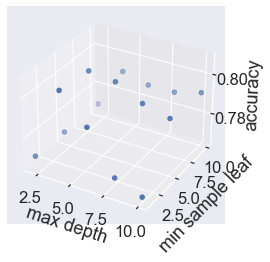

In [20]:
# 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

xs = cv_results['param_max_depth']
ys = cv_results['param_min_samples_leaf']
zs = cv_results['mean_test_score']
ax.scatter(xs, ys, zs)

ax.set_xlabel('max depth')
ax.set_ylabel('min sample leaf')
ax.set_zlabel('accuracy')

========== accuracy (max_depth = 4, min_samples_leaf = 1) ==========
0.7902097902097902


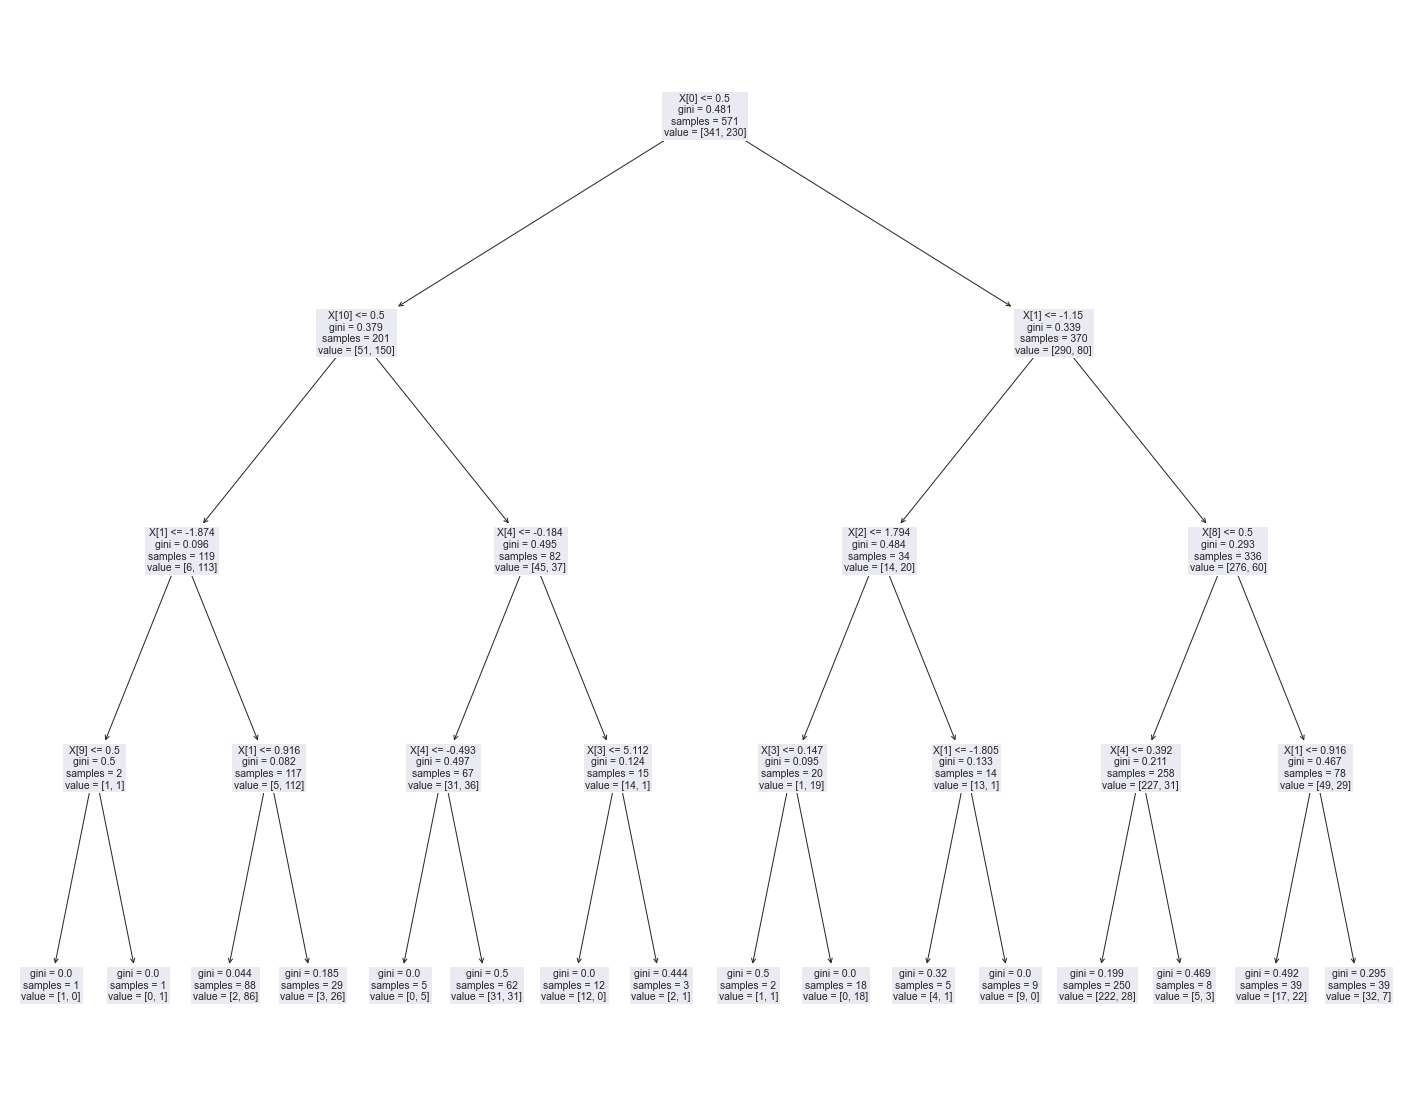

In [21]:
# model with the best hyperparameters got through cross-validation
model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1)
model.fit(X , y)
yhat_test = model.predict(df_test_dropna[feature])
acc = metrics.accuracy_score(df_test_dropna['Survived'], yhat_test)

print('========== accuracy (max_depth = 4, min_samples_leaf = 1) ==========')
print(acc)

# plot tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(model)
plt.show()

1. Within the scope of the hyperparameter I tuned, adding min_samples_leaf doe not provide a better performance. 
2. combination of `max_depth` = 4 and `min-samples_leaf` =1 achieves the highest accuracy. Probably because the scope of the value I tuned is not large, the results to these two parameters does not seems to be very sensitive.

### 2.4 Support Vector Machines, for comparison

As a starting point, use the basic [sklearn SVM model](https://scikit-learn.org/stable/modules/svm.html), with the default constant penalization (C=1), to predict survival using the same set of features as above. Report your accuracy on the test and train sets.

Next, use cross-validation to determine a possibly better choice for C. Note that regularization is inversely proportional to the value of C in sklearn, i.e. the higher value you choose for C the less you regularize. Plot a graph with C on the x-axis and cross-validated accuracy on the y-axis.
    
    
How does the test performance with SVM for your best choice of C compare to the decision tree from 2.3?

In [22]:
# Your code here
from sklearn import svm

# Report your accuracy on the test and train sets.
feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = df_train_dropna[feature] 
y = df_train_dropna['Survived']

clf = svm.SVC()
clf.fit(X, y)

y_pred_test = clf.predict(df_test_dropna[feature])
y_pred_train = clf.predict(X)

y_test = df_test_dropna['Survived']

print("Accuracy(train set):",metrics.accuracy_score(y, y_pred_train))
print("Accuracy(test set):",metrics.accuracy_score(y_test, y_pred_test))

Accuracy(train set): 0.8353765323992994
Accuracy(test set): 0.8461538461538461


In [23]:
feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = df_train_dropna[feature] 
y = df_train_dropna['Survived']

model = svm.SVC()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {'C':np.linspace(1,10,10, dtype = int)}
cv_model = GridSearchCV(model, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
1       0.003120      0.000100         0.001530        0.000077       2   
0       0.003480      0.000426         0.001820        0.000201       1   
3       0.003056      0.000146         0.001386        0.000017       4   
2       0.003062      0.000141         0.001455        0.000058       3   
4       0.003152      0.000072         0.001405        0.000031       5   

     params  split0_test_score  split1_test_score  split2_test_score  \
1  {'C': 2}           0.808696           0.807018           0.789474   
0  {'C': 1}           0.826087           0.789474           0.771930   
3  {'C': 4}           0.791304           0.807018           0.780702   
2  {'C': 3}           0.800000           0.798246           0.780702   
4  {'C': 5}           0.773913           0.815789           0.780702   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
1           0.798246  ...         0.803844        0.009101                1   
0           0.798246  ...         0.802059        0.020806                2   
3           0.807018  ...         0.800366        0.012611                3   
2           0.807018  ...         0.800351        0.011605                4   
4           0.798246  ...         0.798642        0.019490                5   

   split0_train_score  split1_train_score  split2_train_score  \
1            0.842105            0.835886            0.857768   
0            0.833333            0.829322            0.844639   
3            0.866228            0.849015            0.862144   
2            0.857456            0.846827            0.859956   
4            0.875000            0.851204            0.868709   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
1            0.846827            0.833698          0.843257         0.008606  
0            0.835886            0.818381          0.832312         0.008588  
3            0.862144            0.849015          0.857710         0.007254  
2            0.853392            0.840263          0.851579         0.007192  
4            0.864333            0.862144          0.864278         0.007875  

[5 rows x 21 columns]

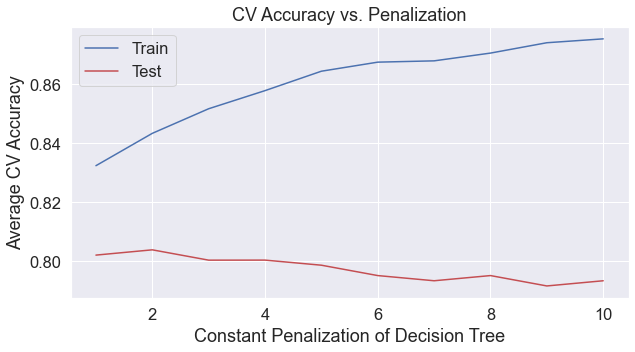

In [24]:
#scatter plot
sns.set(font_scale=1.5)
fig, ax = plt.subplots(1, figsize=(10, 5))

ax.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train', color = 'b')
ax.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test', color = 'r')

ax.set_xlabel('Constant Penalization of Decision Tree')
ax.set_ylabel('Average CV Accuracy')
ax.set_title('CV Accuracy vs. Penalization')
ax.legend(loc='best')
plt.show()

In [25]:
feature = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = df_train_dropna[feature] 
y = df_train_dropna['Survived']

clf = svm.SVC(C =2)
clf.fit(X, y)

y_pred_test = clf.predict(df_test_dropna[feature])
y_pred_train = clf.predict(X)

y_test = df_test_dropna['Survived']

print("Accuracy(train set):",metrics.accuracy_score(y, y_pred_train))
print("Accuracy(test set):",metrics.accuracy_score(y_test, y_pred_test))

Accuracy(train set): 0.8423817863397548
Accuracy(test set): 0.8321678321678322


* the test performance with SVM for your best choice of C (acc = 0.83) is better compared with the decision tree from 2.3 (0.79)

### 2.5 Missing Data, Imputation and Feature Engineering

Have you been paying close attention to your features? If not, now is a good time to start. Perform analysis that allows you to answer the following questions:
* Recall from part 1 that some features have missing data. Which features have missingness?
* Try running the decision tree and SVM models from part 1 using all columns, including those with missing data. What happens?
* Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.
* Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
* Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?

In [26]:
# Recall from part 1 that some features have missing data. Which features have missingness?
print(df.isnull().sum())

Survived        0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Cabin         687
Age*Fare      177
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Pclass_1        0
Pclass_2        0
Pclass_3        0
dtype: int64


In [27]:
## resplitting training and test data without dropping N/A
train_percent = .80
train_number = int(train_percent*len(df))

ids = np.arange(0, len(df), 1)
ids = np.random.permutation(ids)
df_shuffled = df.iloc[ids]

df_train = df_shuffled[:train_number]
df_test = df_shuffled[train_number:]

In [28]:
# Try running the decision tree and SVM models from part 1 using all columns, including those with missing data. What happens?
np.random.seed(seed=13579)

feature_all = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']
X = df_train[feature_all] 
y = df_train['Survived']
## SVM
clf = svm.SVC()
clf.fit(X, y)
y_pred = clf.predict(df_test[feature_all])

## DecisionTree
clf = DecisionTreeClassifier().fit(X, y)
y_pred = clf.predict(df_test[feature_all])

#print("Accuracy(train set):",metrics.accuracy_score(y, y_pred_train))
#print("Accuracy(test set):",metrics.accuracy_score(y_test, y_pred_test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [29]:
# Use one of the methods we discussed in class to impute missing values for each feature. For each feature with missingness, describe the method used and why it is appropriate to the feature.

# Age: replace NA in Age with the mean value of Age
mean = np.mean(df_train['Age'])
#df_train['Age_FE'] = df_train['Age']
df_train['Age'] = df_train['Age'].fillna(mean)

# Cabin: because the missing value percentage is almost 77 percent, I will choose to ignore this variable instead of feature engineering it

# Find a way to engineer meaningful features from the "Name" and/or "Cabin" fields in the data.
df_train['name_len'] = df_train.Name.str.split(" ").map(lambda x: len(x))

df_train.head()

/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_24252/2917191451.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Age'] = df_train['Age'].fillna(mean)
/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_24252/2917191451.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['name_len'] = df_train.Name.str.split(" ").map(lambda x: len(x))


Survived                       Name  Sex       Age     SibSp     Parch  \
377         0  Widener, Mr. Harry Elkins    1 -0.185937 -0.474545  2.008933   
853         1  Lines, Miss. Mary Conover    0 -0.943705 -0.474545  0.767630   
525         0         Farrell, Mr. James    1  0.744051 -0.474545 -0.473674   
661         0          Badt, Mr. Mohamed    1  0.709607 -0.474545 -0.473674   
514         0          Coleff, Mr. Satio    1 -0.392601 -0.474545 -0.473674   

         Fare Cabin   Age*Fare  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  \
377  3.610065   C82  5710.5000           1           0           0         1   
853  0.144885   D28   630.4000           0           0           1         1   
525 -0.492378   NaN   313.8750           0           1           0         0   
661 -0.502949   NaN   289.0000           1           0           0         0   
514 -0.497496   NaN   179.8992           0           0           1         0   

     Pclass_2  Pclass_3  name_len  
377         0         0         4  
853         0         0         4  
525         0         1         3  
661         0         1         3  
514         0         1         3

In [30]:
# feature engineering test set

mean = np.mean(df_test['Age'])
df_test['Age'] = df_test['Age'].fillna(mean)

df_test['name_len'] = df_test.Name.str.split(" ").map(lambda x: len(x))
df_test.head()

/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_24252/1401673744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = df_test['Age'].fillna(mean)
/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_24252/1401673744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['name_len'] = df_test.Name.str.split(" ").map(lambda x: len(x))


Survived                                               Name  Sex  \
404         0                            Oreskovic, Miss. Marija    0   
431         1  Thorneycroft, Mrs. Percival (Florence Kate White)    0   
740         1                        Hawksford, Mr. Walter James    1   
591         1    Stephenson, Mrs. Walter Bertram (Martha Eustis)    0   
304         0                  Williams, Mr. Howard Hugh "Harry"    1   

          Age     SibSp     Parch      Fare Cabin   Age*Fare  Embarked_C  \
404 -0.668153 -0.474545 -0.473674 -0.474005   NaN   173.2500           0   
431  0.022489  0.432793 -0.473674 -0.324253   NaN        NaN           0   
740  0.022489 -0.474545 -0.473674 -0.044381   D45        NaN           0   
591  1.536263  0.432793 -0.473674  0.927454   D20  4069.8684           1   
304  0.022489 -0.474545 -0.473674 -0.486337   NaN        NaN           0   

     Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  name_len  
404           0           1         0         0         1         3  
431           0           1         0         0         1         6  
740           0           1         1         0         0         4  
591           0           0         1         0         0         6  
304           0           1         0         0         1         5

In [31]:
# CV SVM
feature_all = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3','name_len']
X = df_train[feature_all] 
y = df_train['Survived']

model = svm.SVC()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {'C':np.linspace(1,10,10, dtype = int)}
cv_model = GridSearchCV(model, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
2       0.003961      0.000082         0.001886        0.000066       3   
3       0.004101      0.000185         0.001970        0.000106       4   
4       0.004071      0.000264         0.001812        0.000086       5   
5       0.004201      0.000381         0.001781        0.000042       6   
7       0.004453      0.000300         0.001791        0.000049       8   

     params  split0_test_score  split1_test_score  split2_test_score  \
2  {'C': 3}           0.839161           0.853147           0.781690   
3  {'C': 4}           0.839161           0.846154           0.781690   
4  {'C': 5}           0.839161           0.846154           0.781690   
5  {'C': 6}           0.839161           0.846154           0.774648   
7  {'C': 8}           0.825175           0.846154           0.774648   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
2           0.781690  ...         0.814518        0.029191                1   
3           0.781690  ...         0.813119        0.027420                2   
4           0.781690  ...         0.810302        0.027610                3   
5           0.788732  ...         0.810302        0.027967                3   
7           0.795775  ...         0.808914        0.024638                5   

   split0_train_score  split1_train_score  split2_train_score  \
2            0.820738            0.827768            0.836842   
3            0.829525            0.829525            0.838596   
4            0.841828            0.831283            0.842105   
5            0.845343            0.831283            0.843860   
7            0.847100            0.833040            0.843860   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
2            0.835088            0.831579          0.830403         0.005747  
3            0.835088            0.838596          0.834266         0.004077  
4            0.835088            0.838596          0.837780         0.004128  
5            0.836842            0.842105          0.839887         0.005172  
7            0.842105            0.842105          0.841642         0.004672  

[5 rows x 21 columns]

In [32]:
model = cv_model.best_estimator_
model.fit(X, y)
yhat_test = model.predict(df_test[feature_all])

print('Best maximum depth: %i' % cv_model.best_params_['C'])

print('Accuracy (test): %.3f' % metrics.accuracy_score(df_test['Survived'], yhat_test))

Best maximum depth: 3
Accuracy (test): 0.838


In [33]:
# Rerun your decision tree and SVM on the new dataset with imputed missing values and the new features, including re-selecting hyperparameters via cross validation. What do you notice?
# Tune hyperparameter: max_depth
feature_all = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3','name_len']
X = df_train[feature_all] 
y = df_train['Survived']

# CV DecisionTree
model = DecisionTreeClassifier()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {'max_depth':[2, 4, 6, 8, 10], 'min_samples_leaf': [1,5,10]}
cv_model = GridSearchCV(model, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
11       0.001002      0.000007         0.000409        0.000008   
3        0.000930      0.000075         0.000423        0.000026   
14       0.001020      0.000010         0.000413        0.000009   
4        0.000888      0.000012         0.000415        0.000014   
7        0.001055      0.000072         0.000449        0.000055   

   param_max_depth param_min_samples_leaf  \
11               8                     10   
3                4                      1   
14              10                     10   
4                4                      5   
7                6                      5   

                                       params  split0_test_score  \
11   {'max_depth': 8, 'min_samples_leaf': 10}           0.867133   
3     {'max_depth': 4, 'min_samples_leaf': 1}           0.846154   
14  {'max_depth': 10, 'min_samples_leaf': 10}           0.867133   
4     {'max_depth': 4, 'min_samples_leaf': 5}           0.853147   
7     {'max_depth': 6, 'min_samples_leaf': 5}           0.839161   

    split1_test_score  split2_test_score  ...  mean_test_score  \
11           0.846154           0.809859  ...         0.818714   
3            0.846154           0.788732  ...         0.815926   
14           0.839161           0.809859  ...         0.815907   
4            0.846154           0.781690  ...         0.814508   
7            0.853147           0.795775  ...         0.810293   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
11        0.034758                1            0.861160            0.852373   
3         0.025079                2            0.833040            0.834798   
14        0.034467                3            0.861160            0.852373   
4         0.029572                4            0.831283            0.826011   
7         0.037407                5            0.854130            0.852373   

    split2_train_score  split3_train_score  split4_train_score  \
11            0.871930            0.854386            0.840351   
3             0.857895            0.847368            0.845614   
14            0.871930            0.854386            0.840351   
4             0.842105            0.840351            0.836842   
7             0.873684            0.849123            0.866667   

    mean_train_score  std_train_score  
11          0.856040         0.010402  
3           0.843743         0.009072  
14          0.856040         0.010402  
4           0.835318         0.005944  
7           0.859195         0.009375  

[5 rows x 22 columns]

In [34]:
model = cv_model.best_estimator_
model.fit(X, y)
yhat_test = model.predict(df_test[feature_all])

print('Best maximum depth: %i' % cv_model.best_params_['max_depth'])
print('Best min samples leaf: %i' % cv_model.best_params_['min_samples_leaf'])

print('Accuracy (test): %.3f' % metrics.accuracy_score(df_test['Survived'], yhat_test))

Best maximum depth: 8
Best min samples leaf: 10
Accuracy (test): 0.804


1. the variables with missing value are 'Age' and 'Cabin'
2. an error message occurs when there are missing values in the input data
3. For 'Age', I fill the missing values with the average value of 'Age'. For Cabin, because the missing value percentage is almost 77 percent, I choose to ignore this variable instead of feature engineering it.
4. I feature engineering 'Name' by making a new varible 'name_len' which equals to the number of words in a name.
5. After feature engineering, the accuracy of Decision Tree increase from 0.79 to 0.8. The accuracy of SVM drop from 0.85 to 0.83.

### 2.6 ROC Curve

For your best decision tree from 2.5, plot the reciever operating characteristic (ROC) curve on the test set data. Report the area under the curve (AUC) score. *Hint*: scikit-learn's built-in predict_proba function may be helpful for this problem.  For each model, identify the point on the ROC curve that is closest to the top-left corner, and identify the associated probability threshold for classification. Place a vertical line on your plot indicating the FPR value at the threshold. Finally, report accuracy on the test set using the threshold you identified. Comparing to the accuracy from 2.5, what do you observe? 

AUC score: 0.896


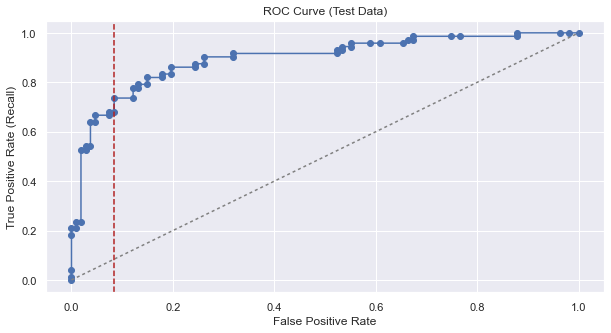

In [49]:
# Your code here
X_test = df_test[feature_all]
y_test = df_test['Survived']

yhat_test_proba = model.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = metrics.roc_curve(y_test, yhat_test_proba)

# Get area under the curve
print('AUC score: %.3f' % metrics.roc_auc_score(y_test, yhat_test_proba))

# roc curve
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.scatter(fprs, tprs)
ax.plot(fprs, tprs)
ax.plot([0, 1], [0, 1], color='grey', dashes=[2, 2])
plt.axvline(fprs[18], color='firebrick', linestyle='--', linewidth=1.5)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC Curve (Test Data)')
plt.show()

In [36]:
# Get "optimal" threshold: the one closest to the top-left corner of the ROC graph
distances_from_top_left = [np.sqrt(tprs[i]**2 + (1-fprs[i])**2) for i in range(len(tprs))]
best_cutoff = np.argmin(distances_from_top_left)
print('Threshold closest to top-left corner of graph: %.2f (%.2f TPR, %.2f FPR)' % 
      (thresholds[best_cutoff], tprs[best_cutoff], fprs[best_cutoff]))

Threshold closest to top-left corner of graph: 0.09 (0.92 TPR, 0.68 FPR)


* Threshold closest to top-left corner of graph: 0.09 (0.92 TPR, 0.68 FPR)

## Part 3: Many Trees

### 3.1: Random Forest
Use the [random forest classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict survival on the titanic. Use cross-validation on the training data to choose the best hyper-parameters --- including the maximum depth, number of trees in the forest, and the minimum samples per leaf.
* What hyperparameters did you select with cross-validation? You should use cross-validation to select all of the hyperparameters (i.e. search a grid of hyperparameters), and report the combination that maximizes cross-validated accuracy). You can use fewer cross validation folds than the 10 folds from previous problems, to keep your code from taking too long to run.
* How does the cross-validated performance (average across validation folds) compare to the test performance (using the top-performing, fitted model selected through cross-validation)?
* How does the RF performance compare to the decision tree and SVM from part 2.5?
* Create 3 subplots that show how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis), maximum depth (x-axis), and minimum samples per leaf (x-axis). What do you observe?

In [37]:
# Your code here
# Tune hyperparameters: max_depth, n_estimators
model = RandomForestClassifier(random_state=1)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {'max_depth':[2, 4, 6, 8], 'n_estimators':[25, 50, 100], 'min_samples_leaf':[1, 5, 10, 15]}
cv_model = GridSearchCV(model, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
38       0.054127      0.000670         0.004428        0.000149   
37       0.027720      0.000388         0.002416        0.000063   
29       0.049077      0.000237         0.003813        0.000068   
26       0.050381      0.000432         0.003923        0.000057   
36       0.014648      0.000756         0.001672        0.000075   

   param_max_depth param_min_samples_leaf param_n_estimators  \
38               8                      1                100   
37               8                      1                 50   
29               6                      5                100   
26               6                      1                100   
36               8                      1                 25   

                                               params  split0_test_score  \
38  {'max_depth': 8, 'min_samples_leaf': 1, 'n_est...           0.825175   
37  {'max_depth': 8, 'min_samples_leaf': 1, 'n_est...           0.832168   
29  {'max_depth': 6, 'min_samples_leaf': 5, 'n_est...           0.804196   
26  {'max_depth': 6, 'min_samples_leaf': 1, 'n_est...           0.818182   
36  {'max_depth': 8, 'min_samples_leaf': 1, 'n_est...           0.832168   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
38           0.881119  ...         0.817315        0.044819                1   
37           0.874126  ...         0.813090        0.040609                2   
29           0.867133  ...         0.810322        0.036425                3   
26           0.874126  ...         0.810293        0.042096                4   
36           0.867133  ...         0.810283        0.039482                5   

    split0_train_score  split1_train_score  split2_train_score  \
38            0.922671            0.912127            0.931579   
37            0.920914            0.913884            0.933333   
29            0.855888            0.854130            0.873684   
26            0.880492            0.868190            0.891228   
36            0.920914            0.913884            0.929825   

    split3_train_score  split4_train_score  mean_train_score  std_train_score  
38            0.929825            0.931579          0.925556         0.007476  
37            0.928070            0.931579          0.925556         0.007223  
29            0.861404            0.859649          0.860951         0.006873  
26            0.894737            0.894737          0.885877         0.010271  
36            0.929825            0.926316          0.924153         0.006082  

[5 rows x 23 columns]

In [38]:
model = cv_model.best_estimator_
model.fit(X, y)
yhat_train = model.predict(X)
yhat_test = model.predict(X_test)

print('Best maximum depth: %i' % cv_model.best_params_['max_depth'])
print('Best number of estimators: %i' % cv_model.best_params_['n_estimators'])
print('Best min_samples_leaf: %i' % cv_model.best_params_['min_samples_leaf'])

print('Accuracy (train): %.2f' % metrics.accuracy_score(y, yhat_train))
print('Accuracy (test): %.2f' % metrics.accuracy_score(y_test, yhat_test))

Best maximum depth: 8
Best number of estimators: 100
Best min_samples_leaf: 1
Accuracy (train): 0.91
Accuracy (test): 0.84


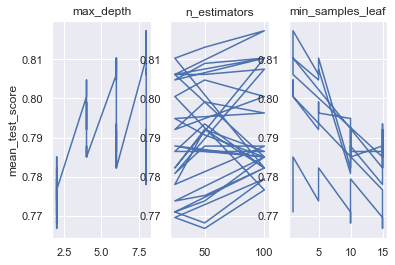

In [39]:
# Create 3 subplots that show how cross-validated performance (y-axis) relates to the number of trees in the forest (x-axis), maximum depth (x-axis), and minimum samples per leaf (x-axis). What do you observe?
sns.set(font_scale=1.0)

plt.subplot(1, 3, 1)
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.title('max_depth')
plt.ylabel('mean_test_score')


plt.subplot(1, 3, 2)
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.title('n_estimators')

plt.subplot(1, 3, 3)
plt.plot(cv_results['param_min_samples_leaf'], cv_results['mean_test_score'])
plt.title('min_samples_leaf')

plt.show()


* Hthe cross-validated performance (0.82) is lower than the test performance (0.84)
* How does the RF performance (0.84) is better than both the decision tree (0.8) and SVM (0.83) from part 2.5

### 3.2: Gradient Boosting

Use the [Gradient Boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to predict survival on the Titanic. Tune your hyperparameters with cross validation. Again, you should tune more parameteres than just `max_depth`.
* How does the GBM performance compare to the other models?
* Create a figure showing the feature importances in your final model (with properly tuned hyperparameters)


In [40]:
# Your code here
model_GBC = GradientBoostingClassifier()
cv = KFold(n_splits=3, shuffle=True, random_state=1)
params = {'max_depth':[2, 4, 6, 8], 'learning_rate':[0.1, 0.01, 0.001],'n_estimators':[100, 500, 1000]}
cv_model = GridSearchCV(model_GBC, param_grid=params, scoring='accuracy', refit=True, return_train_score=True, cv=cv)
cv_model.fit(X, y)
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results.sort_values('mean_test_score',ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.047793      0.000362         0.000952        0.000056   
29       0.482446      0.006650         0.003160        0.000079   
32       0.787110      0.043417         0.004047        0.000246   
0        0.026408      0.000912         0.001019        0.000135   
18       0.077888      0.004081         0.001167        0.000060   

   param_learning_rate param_max_depth param_n_estimators  \
15                0.01               4                100   
29               0.001               4               1000   
32               0.001               6               1000   
0                  0.1               2                100   
18                0.01               6                100   

                                               params  split0_test_score  \
15  {'learning_rate': 0.01, 'max_depth': 4, 'n_est...           0.831933   
29  {'learning_rate': 0.001, 'max_depth': 4, 'n_es...           0.831933   
32  {'learning_rate': 0.001, 'max_depth': 6, 'n_es...           0.831933   
0   {'learning_rate': 0.1, 'max_depth': 2, 'n_esti...           0.844538   
18  {'learning_rate': 0.01, 'max_depth': 6, 'n_est...           0.836134   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
15           0.822785           0.772152         0.808956        0.026291   
29           0.822785           0.772152         0.808956        0.026291   
32           0.818565           0.763713         0.804737        0.029517   
0            0.780591           0.789030         0.804719        0.028366   
18           0.810127           0.763713         0.803325        0.029955   

    rank_test_score  split0_train_score  split1_train_score  \
15                1            0.848101            0.871579   
29                1            0.848101            0.871579   
32                3            0.896624            0.917895   
0                 4            0.862869            0.882105   
18                5            0.896624            0.917895   

    split2_train_score  mean_train_score  std_train_score  
15            0.858947          0.859543         0.009594  
29            0.858947          0.859543         0.009594  
32            0.915789          0.910103         0.009569  
0             0.886316          0.877097         0.010206  
18            0.915789          0.910103         0.009569

In [41]:
model_GBC = cv_model.best_estimator_
model_GBC.fit(X, y)
yhat_train = model_GBC.predict(X)
yhat_test = model_GBC.predict(X_test)

print('Best maximum depth: %i' % cv_model.best_params_['max_depth'])
print('Best number of estimators: %i' % cv_model.best_params_['n_estimators'])
print('Best learning_rate: %f' % cv_model.best_params_['learning_rate'])

print('Accuracy (train): %.2f' % metrics.accuracy_score(y, yhat_train))
print('Accuracy (test): %.2f' % metrics.accuracy_score(y_test, yhat_test))

Best maximum depth: 4
Best number of estimators: 100
Best learning_rate: 0.010000
Accuracy (train): 0.86
Accuracy (test): 0.80


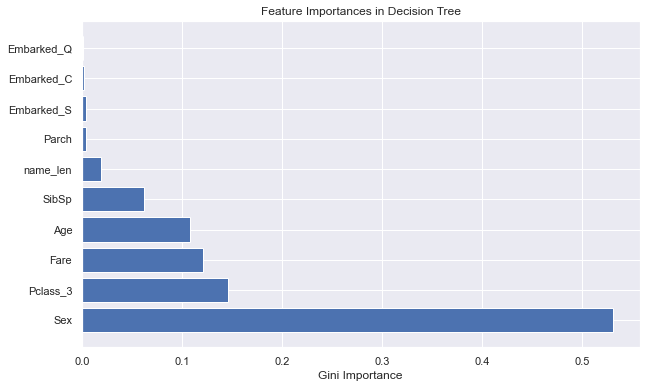

In [42]:
importances = model_GBC.feature_importances_
importances = pd.DataFrame([X.columns, importances]).T
importances.columns = ['Feature', 'Importance']
importances = importances.sort_values('Importance', ascending=False)[:10]

# Bar chart
fig, ax = plt.subplots(1, figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'])
ax.set_xlabel('Gini Importance')
ax.set_title('Feature Importances in Decision Tree')
plt.show()

* GBM performance (0.8) 
* Random forest (0.83)
* Decision tree (0.80)
* SVM (0.83)

## Part 4: Neural Networks

Carry on the classification by using feed forward neural networks, using functionality imported from [keras](https://keras.io/api/). You are responsible for choosing the number of layers, their corresponding size, the activation functions and the choice of gradient descent algorithm (and its parameters e.g. learning rate). Pick those parameters by hand. For some of them you can also perform cross-validation if you wish, but cross validation is not required. Your goal is to tune those parameters so that your test accuracy is at least above 75%. 

Report your accuracy on the test set along with your choice of parameters. More specifically, report the number of layers, their size, the activation functions and your choice of optimization algorithm. 

It is a good exercise to experiment with different optimizers (gradient descent, stochastic gradient descent, AdaGrad etc), learning rates, batch sizes etc. to get a feeling of how they affect neural network training. Experiment with some of these options. What do you observe?

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [76]:
# Your code here
feature_all = ['Sex','Age','SibSp', 'Parch','Fare','Embarked_C','Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3','name_len']
X = df_train[feature_all] 
y = df_train['Survived']
X_test = df_test[feature_all]
y_test = df_test['Survived']

# Random seeds
np.random.seed(1)
tf.random.set_seed(1)

# Define NN
model = Sequential()
#model.add(Dense(5, input_dim=len(X.columns), activation='relu')) # First layer defines input_dim
#model.add(Dense(1, activation='relu')) 

model.add(Dense(120, activation='relu', input_dim=20)) #input_dim = number of input features
model.add(Dense(60, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


# Fit and predict with NN
model.fit(X, y, epochs=50, batch_size=10, verbose=0)
yhat_train = model.predict(X)
yhat_test = model.predict(X_test)


# Get metrics
print(yhat_train)
#print('Accuracy on training set: %.2f' % model.evaluate(y, yhat_train, verbose=0))
#print('Accuracy on test set: %.2f' % model.evaluat(y_test, yhat_test,verbose=0))



ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_19" is incompatible with the layer: expected shape=(None, 20), found shape=(None, 12)


In [74]:
X = df.drop(columns=['Name', 'Survived', 'Cabin'])

y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# one hot encode outputs
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Define Sequential model
model = Sequential()
model.add(Dense(120, activation='relu', input_dim=20)) #input_dim = number of input features
model.add(Dense(60, activation='relu'))
model.add(Dense(2, activation='softmax'))

optimizers = {"SGD_001": tf.keras.optimizers.SGD(learning_rate=0.001),
              "Adagrad_001": tf.keras.optimizers.Adagrad(learning_rate=0.001),
              "Adam_001": tf.keras.optimizers.Adam(learning_rate=0.001),
              "SGD_01": tf.keras.optimizers.SGD(learning_rate=0.01),
              "Adagrad_01": tf.keras.optimizers.Adagrad(learning_rate=0.01),
              "Adam_01": tf.keras.optimizers.Adam(learning_rate=0.01),
              "SGD_1": tf.keras.optimizers.SGD(learning_rate=0.1),
              "Adagrad_1": tf.keras.optimizers.Adagrad(learning_rate=0.1),
              "Adam_1": tf.keras.optimizers.Adam(learning_rate=0.1),
             }

perf = {}
for optim, opt in optimizers.items():
    # Compile the model
    model.compile(optimizer=opt, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    # training
    model.fit(X_train, y_train, epochs=30)

    # performance
    pred_train= model.predict(X_train)
    scores = model.evaluate(X_train, y_train, verbose=0) 
    pred_test= model.predict(X_test)
    scores2 = model.evaluate(X_test, y_test, verbose=0)
    perf.update({optim: [scores[1], scores2[1]]})

Epoch 1/30


ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/aml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_17" is incompatible with the layer: expected shape=(None, 20), found shape=(None, 11)


*Your observations here*

## Part 5: Putting it all together!

Create a final table that summarizes the performance of your models as follows. What do you observe? Are there trends in which models and hyperparameters work best?

| Model | Cross-validated Performance   | Train Performance | Test Performance | Chosen Hyperparameters | 
|------|------|------| | |
|   Decision Tree        |  |  |  |  |
|   Decision Tree (with imputed missing values and new features) |  |  |  |  |
|   SVM  |  |  |  |  |
|   SVM (with imputed missing values and new features)        |  |  |  |  |
|   Random Forest        |  |  |  |  |
|   Random Forest (with imputed missing values and new features)        |  |   |  | |
|   Gradient Boosting    |  |  |  |  |
|   Gradient Boosting (with imputed missing values and new features)        |  |  |  |  |
|   Neural Network    |  |  |  |  |
|   Neural Network (with imputed missing values and new features)        |  |   |  |  |

*Your observations here*

## Part 6: (Extra credit) Flex your ML chops

Add additional rows to the table from Part 5 based on other models you've learned in class.
 - Which models perform the best, using the default parameters (i.e., no hyperparameter tuning)?
 - How do models perform in terms of performance metrics beyond accuracy? (e.g. AUC score, precision, recall) 
 - For which models does careful hyperparameter tuning make the biggest different? Why do you think that is the case?
 - Which tuned model has the largest gap between cross-validated performance and test performance? Why might that be?

In [13]:
# Your code here

*Your observations here*